In [1]:
from sklearn.datasets import load_digits
import numpy as np
from scipy.spatial import distance
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
################################################
# Assign each point to nearest cluster by calculating
# its distance to each centroid.
# Find new cluster center by taking the average of
# the assigned points.

## Part1 K-means cluster the handwriting-digits dataset


In [2]:
def cluster_Kmeans(data,cluster_num):
    cluster_centroids = []
    cluster_centroids_new = [[] for x in range(cluster_num)]
    for i in range(cluster_num):
        centroid_temp = np.random.rand(1,n_features)*10
        cluster_centroids.append(centroid_temp)
    for i in range(cluster_num):
        centroid_temp =  np.random.rand(1,n_features)*10
        cluster_centroids.append(centroid_temp)

    while True:
        cluster_distance = []
        cluster_dict = [[] for x in range(cluster_num)]
        clusters_predictions = []
        for i in range(cluster_num):
            centroid_temp = cluster_centroids[i]
            cluster_distance.append(distance.cdist(centroid_temp, data, 'euclidean').reshape(1, len(data)))

        for i in range(len(data)):
            distance_i = [cluster_distance[cluster_index][0,i] for cluster_index in range(cluster_num)]
            (m, index) = min((v, index) for index, v in enumerate(distance_i))
            cluster_dict[index].append(i)
            clusters_predictions.append(index)

        for i in range(cluster_num):
            cluster_temp = cluster_dict[i]
            data_temp = data[cluster_temp,0:n_features]
            cluster_centroids_new[i] = np.asarray([np.mean(data_temp,axis=0)]).reshape(1,n_features)
        if cluster_centroids_new == cluster_centroids:
            break
        else:
            cluster_centroids = cluster_centroids_new
    return cluster_dict, cluster_centroids, np.asarray(clusters_predictions)

digits = load_digits(n_class=10, return_X_y=False)
digits_data = digits.data
n_samples, n_features = digits_data.shape
digits_label = digits.target
K = 10
cluster_dict,cluster_centroids, cluster_predictions = cluster_Kmeans(digits_data,cluster_num=K)
cluster_mstcm = [np.asarray(Counter(digits_label[cluster_dict[i]]).most_common(1)) for i in range(K)]
cluster_label = []
for cluster in cluster_mstcm:
    if cluster.size==0 :cluster_label.append([])
    else:cluster_label.append(cluster[0, 0])
digits_predictions = np.copy(cluster_predictions)
cluster_empty = []
for i in range(K):
    if cluster_label[i] == []:
        cluster_empty.append(K)
    else:
        digits_predictions[np.asarray(cluster_dict[i])] = cluster_label[i]
confusion_mat = metrics.confusion_matrix(digits_label,cluster_predictions)
accuracy = metrics.fowlkes_mallows_score(digits_label, cluster_predictions)
print("Confusion matrix is:")
print(confusion_mat)
print("Empty clusters are:")
print(cluster_empty, "=-1")
print("Accuray",accuracy)

Confusion matrix is:
[[  7   1   0  15  11   0 144   0   0   0]
 [ 16  83  52   0  10   0   1   2  18   0]
 [  0   6 107   2  60   2   0   0   0   0]
 [  2   0  72  19  86   2   0   2   0   0]
 [ 37  86   0   0   0   2   9   7  40   0]
 [ 77   0   0   2   5  41   1  56   0   0]
 [  4   4   8   0 113   0  52   0   0   0]
 [  0  32   2 123   0   3   2  11   6   0]
 [  4  42  18   6  85   4   5  10   0   0]
 [ 44   0   0  12  99   2   1  12  10   0]]
Empty clusters are:
[10] =-1
Accuray 5.620558094529484


c:\users\ruojun li\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\ruojun li\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
c:\users\ruojun li\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
c:\users\ruojun li\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


Computing embedding
Done.


c:\users\ruojun li\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


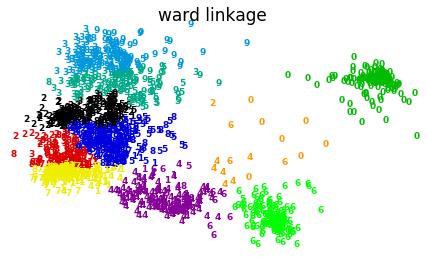

Confusion matrix is:
[[  0   0   0   0   0 171   0   0   7   0]
 [  4   4  70   0   0   0   0  87   0  17]
 [130   0  29   0   3   0   0   0   1  14]
 [ 19   0   7  92  56   0   0   0   0   9]
 [  0 166   1   0   0   0   0   7   6   1]
 [ 27   2 104   8  40   0   1   0   0   0]
 [  0  11   0   0   0   0 167   0   3   0]
 [  0   0  15   0   0   0   0 136   0  28]
 [ 39   2  60   2   4   0   0   9   0  58]
 [  3   0  27  85  57   0   0   4   0   4]]
Accuray nan


In [3]:
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

np.random.seed(0)



#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(digits_label[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(digits_data)
print("Done.")

linkage = 'ward'
clustering = AgglomerativeClustering(linkage=linkage, n_clusters=K)
clustering.fit(X_red)
confusion_mat = metrics.confusion_matrix(digits_label,clustering.labels_)
accuracy = metrics.fowlkes_mallows_score(digits_label, clustering.labels_)
plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)
plt.show()
print("Confusion matrix is:")
print(confusion_mat)
print("Accuray",accuracy)

In [16]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation().fit(digits_data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(digits_label, labels))
print("Completeness: %0.3f" % metrics.completeness_score(digits_label, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(digits_label, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(digits_label, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(digits_label, labels))


Automatically created module for IPython interactive environment
Estimated number of clusters: 103
Homogeneity: 0.959
Completeness: 0.487
V-measure: 0.646
Adjusted Rand Index: 0.175
Adjusted Mutual Information: 0.451


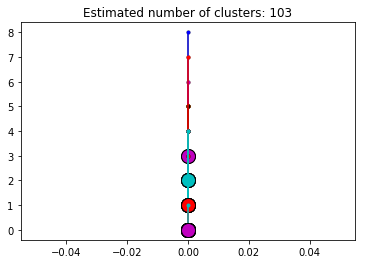

In [17]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = digits_data[cluster_centers_indices[k]]
    plt.plot(digits_data[class_members, 0], digits_data[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in digits_data[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()